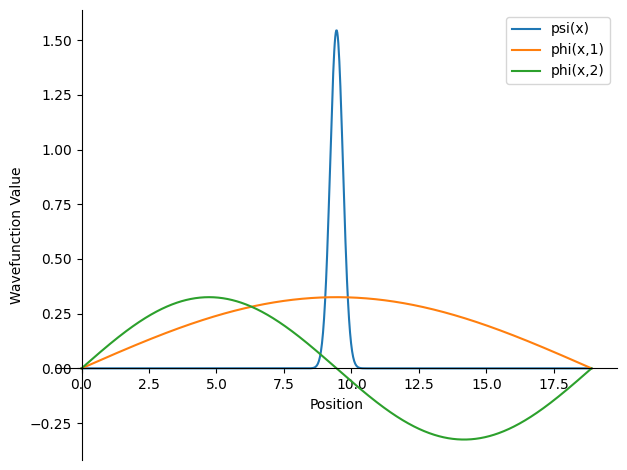

['n', 'c[n]']
[1, np.complex128(0.29746618385884294+0j)]
[2, np.complex128(8.694320277394995e-17+0j)]
[3, np.complex128(-0.29563691062434627+0j)]
[4, np.complex128(-1.7388643326042481e-16+0j)]
[5, np.complex128(0.2920120424168867+0j)]
[6, np.complex128(2.608297110891297e-16+0j)]
[7, np.complex128(-0.28665790447275+0j)]
[8, np.complex128(-3.4777306281790105e-16+0j)]
[9, np.complex128(0.2796714505507121+0j)]
[10, np.complex128(4.3471649652955863e-16+0j)]
[11, np.complex128(-0.2711773431349046+0j)]
[12, np.complex128(-5.216599758514133e-16+0j)]
[13, np.complex128(0.2613242551308872+0j)]
[14, np.complex128(3.130839521468702e-15+0j)]
[15, np.complex128(-0.25028054628035135+0j)]
[16, np.complex128(-6.955469466193526e-16+0j)]
[17, np.complex128(0.23822948976522892+0j)]
[18, np.complex128(7.824904334466829e-16+0j)]
[19, np.complex128(-0.22536423759094326+0j)]
[20, np.complex128(-8.694338660036519e-16+0j)]
[21, np.complex128(0.21188271692497046+0j)]
[22, np.complex128(3.4786133085649884e-15+0j)

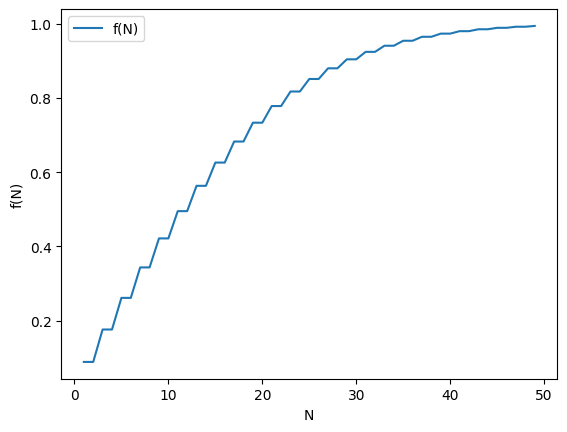

For N = 50, f(N) is 0.994534.


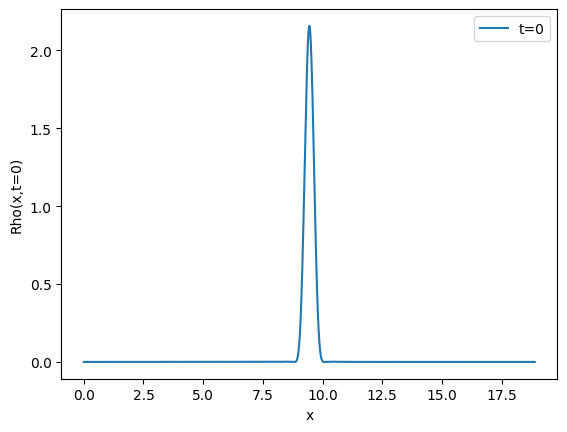

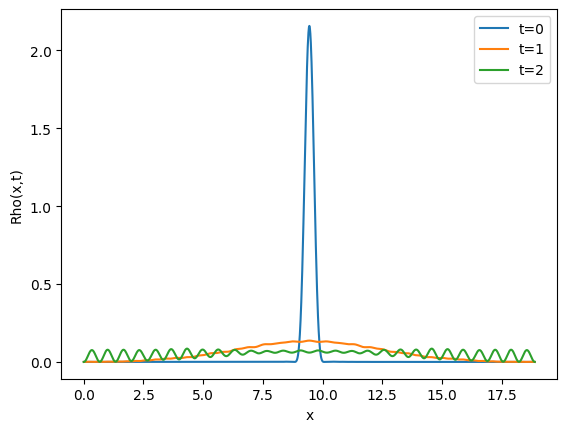

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

def complex_quadrature(func, a, b, **kwargs):
    import scipy.integrate
    
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    return real_integral[0] + 1j*imag_integral[0]

ANGSTROMS_TO_BOHR = 0.529177 # angstrom in atomic units
HBAR = 1 # hbar in atomic units
M = 1 # mass in atomic units
A = 8 * ANGSTROMS_TO_BOHR # value of a in atomic units
L = 10 / ANGSTROMS_TO_BOHR # value of L in atomic units

x, n = symbols('x, n')
psi = (A**2 / pi)**(1/4) * exp(-A**2 * (x-L/2)**2 / 2)
phi = sqrt(2/L) * sin(n * pi * x / L)

p=plot(psi, phi.subs(n,1), phi.subs(n,2), (x,0,L), legend=True, show=False,xlabel='Position',ylabel='Wavefunction Value')
p[0].label="psi(x)"
p[1].label="phi(x,1)"
p[2].label="phi(x,2)"
p.show()

NSTATES = 50 # number of basis states in the expansion

c = np.zeros(NSTATES+1, dtype=np.cdouble) # (complex) zero array in NumPy format to store the overlaps with the basis functions

for i in range(1,NSTATES+1):
    integrand = lambdify(x,psi*phi.subs(n,i)) # convert SymPy expression into a Python function
    c[i]=complex_quadrature(integrand,0,L) # overlap of psi and phi_n
      
print(["n", "c[n]"])
for i in range(1,NSTATES+1):
    print([i,c[i]]) # print the expansion coefficients

def cumulative_probability(N):
    prob = 0
    for i in range(1, N + 1):
        prob += np.real(c[i] * np.conj(c[i]))
    return prob

# Generate x values
xvalue = range(1, NSTATES)

# Calculate cumulative probability for each N
probabilities = [cumulative_probability(N) for N in xvalue]

# Plot the cumulative probability density
plt.plot(xvalue, probabilities, label='f(N)')
plt.xlabel('N')
plt.ylabel('f(N)')
plt.legend()
plt.show()

print("For N = %d, f(N) is %f." % (NSTATES, cumulative_probability(NSTATES)))

E = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) # energies of the basis states

t=Symbol('t') # time 
c=Array(c) # convert the NumPy array of expansion coefficients into a SymPy array

psi0 = Sum(c[n]*phi,(n,1,NSTATES)) # reconstruct the wavefunction at time t=0 Sigma_i c_i \phi_i
rho0 = re(psi0 * conjugate(psi0)) # initial probability density

rho0_lambda = lambdify(x, rho0) # create a Python function out of the SymPy expression so the code runs faster
xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.xlabel('x')
plt.ylabel('Rho(x,t=0)')
plt.legend()
plt.show()

# def Energy(n): 
#     return ((n*np.pi*HBAR/L)**2)/(2*M) # Energy of \phi_n eigenfunction

"""
E = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) is defined above, which is symbolic expression.
To use it, we can use E.subs(n,1), E.subs(n,2), ... (substitute n with 1,2,...)
"""
import sympy as sp

Time_evolution = sp.exp(1j*(-E*t/HBAR)) # Time evolution of \phi_n

# Time_evolution.subs([(n,1),(t,1)])

psit_1 = Sum(c[n]*phi*Time_evolution,(n,1,NSTATES)).subs(t,1) # reconstruct the wavefunction at time t=0 Sigma_i c_i \phi_i
rhot_1 = re(psit_1 * conjugate(psit_1)) # initial probability density
rhot_1_lambda = lambdify(x, rhot_1) # create a Python function out of the SymPy expression so the code runs faster

psit_2 = Sum(c[n]*phi*Time_evolution,(n,1,NSTATES)).subs(t,2) # reconstruct the wavefunction at time t=0 Sigma_i c_i \phi_i
rhot_2 = re(psit_2 * conjugate(psit_2)) # initial probability density
rhot_2_lambda = lambdify(x, rhot_2) # create a Python function out of the SymPy expression so the code runs faster

xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.plot(xvals, rhot_1_lambda(xvals), label='t=1') # plot the probability density
plt.plot(xvals, rhot_2_lambda(xvals), label='t=2') # plot the probability density

plt.xlabel('x')
plt.ylabel('Rho(x,t)')
plt.legend()
plt.show()



In [3]:
xt = integrate(root*x, (x,0,L)) # calculate <x(t)> (note that $\int{\Psi^*(x,t) x \Psi(x,t)} = \int{\rho(x,t) x })
# such that the expectation value can be calculated directly from the density instead of the eigenfunction.
xt_lambda = np.vectorize(lambdify(t,xt))
tvals=np.arange(0,1.5,0.01)
plt.plot(tvals,xt_lambda(tvals))
plt.ylim(0,L)

TypeError: unsupported operand type(s) for *: 'function' and 'Symbol'

ValueError: x and y must have same first dimension, but have shapes (150,) and (1,)

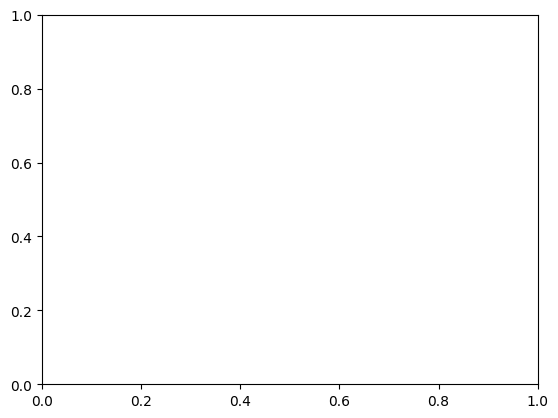

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, t, L = sp.symbols('x t L')

# Calculate the integral
xt = sp.integrate(sp.sqrt(x), (x, 0, L))  # Ensure proper function usage

# Lambdify the expression
xt_lambda = sp.lambdify(t, xt, 'numpy')

# Generate values and plot
tvals = np.arange(0, 1.5, 0.01)
plt.plot(tvals, xt_lambda(tvals))
plt.ylim(0, L)  # Ensure L is defined before this line
plt.show()
